# Titanic Machine Learning Exercise

## Import and Analyse Data

In [48]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# Import Raw Data
train_data = pd.read_csv(r'C:\Users\Qaahir Akram\Documents\Programming\Output Files\Titanic Exercise\train.csv')
test_data = pd.read_csv(r'C:\Users\Qaahir Akram\Documents\Programming\Output Files\Titanic Exercise\test.csv')

# Create Combined Data for effective preprocessing
comb_data = [train_data, test_data]

Examine Train Data

In [50]:
# View sample of the raw data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
# Statistical information of raw data
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [52]:
# Check raw data for missing values
print(train_data.shape)
missing_val_count_by_column = train_data.isnull().sum()
print('Missing values: ')
print(missing_val_count_by_column[missing_val_count_by_column > 0])

(891, 12)
Missing values: 
Age         177
Cabin       687
Embarked      2
dtype: int64


In [53]:
# Check raw data for categorical variables
s = (train_data.dtypes == 'object')
object_cols = list(s[s].index)
print('Categorical variables: ')
print(object_cols)

Categorical variables: 
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


Examine Test Data

In [54]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Analyse by Pivoting Data

Survival Rate by Sex

In [55]:
train_data[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Survival Rate by PClass

In [56]:
train_data[['Pclass', 'Survived']].groupby('Pclass', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Survival Rate by Embarked

In [57]:
train_data[['Embarked', 'Survived']].groupby('Embarked', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Survival by Siblings/Spouse

In [58]:
train_data[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Survived by Parents/Children

In [59]:
train_data[['Parch', 'Survived']].groupby('Parch', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Visualise Data

Survival by Age

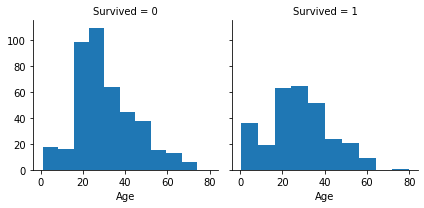

In [60]:
g = sns.FacetGrid(train_data, col = 'Survived')
g.map(plt.hist, 'Age')

Survival by PClass

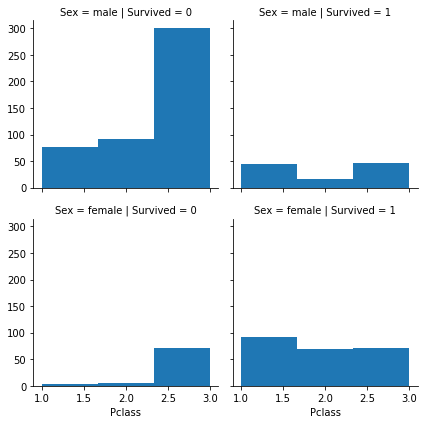

In [61]:
g = sns.FacetGrid(train_data, col = 'Survived', row = 'Sex')
g.map(plt.hist, 'Pclass', bins = 3)

Survival by Embarkment Location

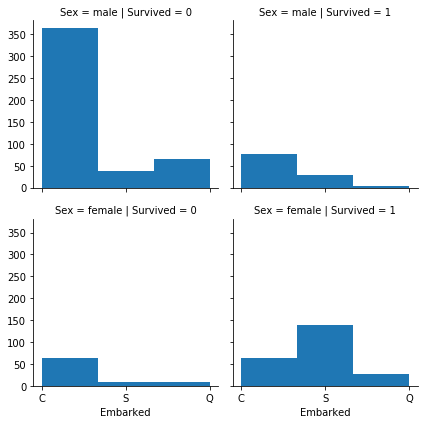

In [62]:
g = sns.FacetGrid(train_data, col = 'Survived', row = 'Sex')
g.map(plt.hist, 'Embarked', bins = 3)

## Train Data Preprocessing

Age Column

In [63]:
# For missing values in the Age column
# Replace missing values with random values in the one standard deviation range
age_mean = train_data.Age.mean() # Mean value of the known ages
age_std = train_data.Age.std() # Standard deviation of the known ages
train_data.Age = train_data.Age.fillna(np.random.randint(age_mean - age_std, age_mean + age_std))
# train_data.Age = train_data.Age.fillna(age_mean)

# Segment ages to form age-groups
train_data['AgeGroup'] = pd.cut(train_data.Age, 5)
train_data[['AgeGroup', 'Survived']].groupby(['AgeGroup'], as_index = False).mean().sort_values(by = 'AgeGroup', ascending = True)


,AgeGroup,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.344168
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [64]:
# Replace Ages with ordinals based on the above Age Groups

train_data['Age'] = train_data['Age'].astype(int)   
train_data.loc[ train_data['Age'] <= 16, 'Age'] = 0
train_data.loc[(train_data['Age'] > 16) & (train_data['Age'] <= 32), 'Age'] = 1
train_data.loc[(train_data['Age'] > 32) & (train_data['Age'] <= 48), 'Age'] = 2
train_data.loc[(train_data['Age'] > 48) & (train_data['Age'] <= 64), 'Age'] = 3
train_data.loc[ train_data['Age'] > 64, 'Age'] = 4

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,7.2500,NaN,S,"(16.336, 32.252]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,PC 17599,71.2833,C85,C,"(32.252, 48.168]"
2,3,1,3,"Heikkinen, Miss. Laina",female,1,0,0,STON/O2. 3101282,7.9250,NaN,S,"(16.336, 32.252]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,113803,53.1000,C123,S,"(32.252, 48.168]"
4,5,0,3,"Allen, Mr. William Henry",male,2,0,0,373450,8.0500,NaN,S,"(32.252, 48.168]"


Sex Column

In [65]:
# For categorical variables in the Sex column
train_data.Sex = train_data.Sex.map( {'female': 1, 'male': 0} ).astype(int)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,S,"(16.336, 32.252]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,C,"(32.252, 48.168]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,"(16.336, 32.252]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,S,"(32.252, 48.168]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,S,"(32.252, 48.168]"


Embarked Column

In [66]:
# For categorical variables in the Embarked column

train_data.Embarked = train_data.Embarked.fillna('C')

train_data.Embarked = train_data.Embarked.map( {'C': 0, 'Q': 1, 'S' : 2} ).astype(int)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,2,"(16.336, 32.252]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,0,"(32.252, 48.168]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,2,"(16.336, 32.252]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,2,"(32.252, 48.168]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,2,"(32.252, 48.168]"


## Test Data Preprocessing

Repeat preprocessing steps performed on Train Data

In [67]:
age_mean = train_data.Age.mean() # Mean value of the known ages
age_std = train_data.Age.std() # Standard deviation of the known ages
test_data.Age = test_data.Age.fillna(np.random.randint(age_mean - age_std, age_mean + age_std))
# test_data.Age = test_data.Age.fillna(age_mean)
test_data['Age'] = test_data['Age'].astype(int)   
test_data.loc[ test_data['Age'] <= 16, 'Age'] = 0
test_data.loc[(test_data['Age'] > 16) & (test_data['Age'] <= 32), 'Age'] = 1
test_data.loc[(test_data['Age'] > 32) & (test_data['Age'] <= 48), 'Age'] = 2
test_data.loc[(test_data['Age'] > 48) & (test_data['Age'] <= 64), 'Age'] = 3
test_data.loc[ test_data['Age'] > 64, 'Age'] = 4

test_data.Embarked = test_data.Embarked.fillna('C')
test_data.Embarked = test_data.Embarked.map( {'C': 0, 'Q': 1, 'S' : 2} ).astype(int)

test_data.Sex = test_data.Sex.map( {'female': 1, 'male': 0} ).astype(int)

Set Target & Feature Data

In [68]:
y = train_data.Survived
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']
X = train_data[features]
test_X = test_data[features]

# Split Raw Data into test & validation subsets
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

## Prediction Model 1: Decision Tree Classifier

## Prediction Model 2: Random Forest Classifier

Determine optimum size of Model

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

def get_RFmae(n_estimators):
    RFmodel = RandomForestClassifier(n_estimators = n_estimators, random_state = 0)
    RFmodel.fit(train_X, train_y)
    RFpreds = RFmodel.predict(val_X)
    RFmae = mean_absolute_error(val_y, RFpreds)
    return RFmae

n_estimators = [25, 30, 40, 50, 75, 100, 125]
scores = {estimators: get_RFmae(estimators) for estimators in n_estimators}
print(scores)
best_number = min(scores, key = scores.get)
best_number


{25: 0.20179372197309417, 30: 0.20179372197309417, 40: 0.19730941704035873, 50: 0.19282511210762332, 75: 0.18385650224215247, 100: 0.18834080717488788, 125: 0.18385650224215247}


75

Create and run optimal model design

In [71]:
RFmodel = RandomForestClassifier(n_estimators = 75, random_state = 0)
RFmodel.fit(X, y)
RFpreds = RFmodel.predict(test_X)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': RFpreds})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


## Prediction Model 3: Gradient Boosting

In [46]:
# from xgboost import XGBClassifier

# XGBmodel = XGBClassifier(n_estimators = 1000, learning_rate = 0.05)
# XGBmodel.fit(X, y)
# XGBpreds = XGBmodel.predict(test_X)

# output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': RFpreds})
# output.to_csv('my_submission.csv', index=False)
# print("Your submission was successfully saved!")